In [1]:
#Author : Walid Boudehane  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Modeling Energy Consumption of a Building in New York 

# The building has a natural gas meter and an electric meter.

In [3]:
# Load data from CSV file
df = pd.read_excel("input.xlsx")

# Clean data by dropping rows with 'Total' in 'Month' column
df = df.drop(df[df['Month'] == 'Total'].index)

# Plot bar chart of natural gas consumption

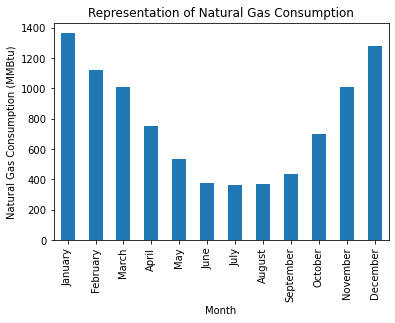

In [4]:
naturalGas = df.drop(df[df['Month'] == 'Total'].index)

naturalGas.plot.bar(x='Month', y='Natural Gas, MMBtu', legend=False)

plt.xlabel("Month")
plt.ylabel("Natural Gas Consumption (MMBtu)")
plt.title("Representation of Natural Gas Consumption")
#Display
plt.show()

#  Representation of electricity consumption

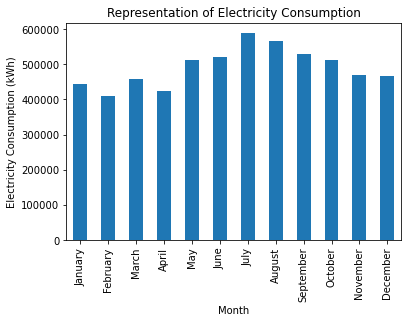

In [5]:
electricity = df.drop(df[df['Month'] == 'Total'].index)

electricity.plot.bar(x='Month', y='Electric, kWh', legend=False)

plt.xlabel("Month")
plt.ylabel("Electricity Consumption (kWh)")
plt.title("Representation of Electricity Consumption")

#Display
plt.show()

#  Calculate the total energy consumption in kBtu

In [16]:
df = pd.read_excel("input.xlsx")
# Natural gas consumption in kBtu

naturalGasConsumption = df['Natural Gas, MMBtu'][df['Month'] == "Total"] * 1000 # 1 MMBtu = 1000 KBtu

# Calculate electricity consumption in kBtu

#1 kW = kWh/h and therefore kWh = Btu
electricityConsumption = (df['Electric, kWh'][df['Month'] == "Total"] * 3412) / 1000 # 1 kBtu = 1000 Btu

#Therefore the energy consumption in kBtu is:
totalConsumption = naturalGasConsumption + electricityConsumption

# The energy intensity is :
#The building area is 110,000 square feet
area = 110000

intensity = float(totalConsumption/area)
print("The value of energy intensity is: ",intensity)

The value of energy intensity is:  267.86843755757576


# Scatter plot representation of natural gas consumption as a function of HDD

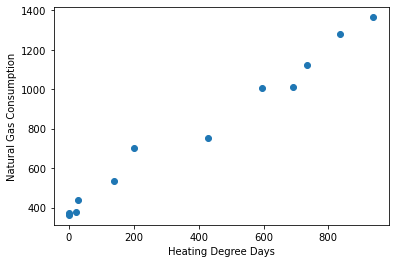

In [7]:
HDD = df['HDD, °F*Day'].drop(df[df['Month'] == 'Total'].index) # without the total row

naturalGas = df['Natural Gas, MMBtu'].drop(df[df['Month'] == 'Total'].index) # without the total row

plt.scatter(HDD, naturalGas)
plt.xlabel("Heating Degree Days")
plt.ylabel("Natural Gas Consumption")
plt.show()

# Scatter plot representation of electricity consumption as a function of CDD 

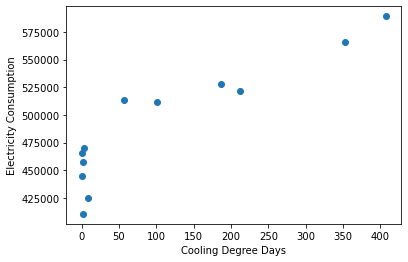

In [8]:
CDD = df['CDD, °F*Day'].drop(df[df['Month'] == 'Total'].index) # without the total row
electricity = df['Electric, kWh'].drop(df[df['Month'] == 'Total'].index) # without the total row

plt.scatter(CDD, electricity)
plt.xlabel("Cooling Degree Days")
plt.ylabel("Electricity Consumption")
plt.show()

# Calculate linear regression parameters between natural gas and HDD

In [13]:
#x1 is the heating degree days
x1 = HDD

#y1 is the natural gas consumption
y1 = naturalGas

#Calculate coefficients a and b such that:
#r_value is the Pearson correlation coefficient.
#p_value is the p-value associated with r_value.
#std_err is the standard error of the linear regression.

a1, b1, r_value, p_value, std_err = linregress(x1, y1)

print("a1 (pente) :", a1)
print("b1 (ordonnée à l'origine) :", b1)

a1 (pente) : 1.018200635646313
b1 (ordonnée à l'origine) : 386.0995833894273


In [10]:
#x2 is the cooling degree days

x2 = CDD
#y2 is the electricity consumption

y2 = electricity
#Calculation of coefficients a and b

a2, b2, r_value, p_value, std_err = linregress(x2, y2)
#Displaying a2 and b2:

print("a2 (slope):", a2)
print("b2 (y-intercept):", b2)

a2 (slope): 344.01800032197514
b2 (y-intercept): 453633.1299643145


# Display the results including the correlation, equation, and R^2 value

Correlation coefficient R^2: 0.8275426527068694


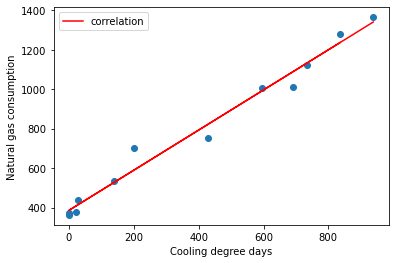

In [11]:
# Update the graphs.

plt.scatter(x1, y1)
plt.xlabel("Cooling degree days")
plt.ylabel("Natural gas consumption")

#Plot the linear regression line on the graph

reg_line1 = a1 * x1 + b1
plt.plot(x1, reg_line1, color='red', label='correlation')

#Display the results including the correlation, equation, and R^2 value

plt.legend(loc='best')

print("Correlation coefficient R^2:", r_value**2)
plt.show()

Correlation coefficient R^2: 0.8275426527068694


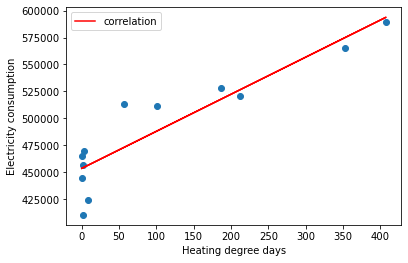

In [12]:
plt.scatter(x2, y2)
plt.xlabel("Heating degree days")
plt.ylabel("Electricity consumption")
#Plot the linear regression line on the graph

reg_line2 = a2 * x2 + b2
plt.plot(x2, reg_line2, color='red', label='correlation')
#Display the results including the correlation, equation, and R^2 value

plt.legend(loc='best')
print("Correlation coefficient R^2:", r_value**2)
plt.show()